O presente notebook possui a intenção de prever o preço de imóveis do Rio de Janeiro. O algoritmo escolhido foi **KNeighborsRegressor**.

# Sobre o KNeighborsRegressor
Se trata de um algoritmo de regressão baseada nos k-vizinhos mais próximos. O alvo é previsto pela interpolação local dos alvos associados aos vizinhos mais próximos no conjunto de treinamento. Ele funciona da seguinte forma:

1. Selecionamos k vizinhos semelhantes mais próximos, usando algum cálculo de distância, com as quais queremos comparar.
1. Agora iremos calcular a semelhança entre cada vizinho e o nosso dado usando uma métrica de similaridade
1. Então classificamos cada vizinho usando nossa métrica de similaridade e selecionamos os primeiros k vizinhos.
1. Por fim, calculamos o valor médio dos k vizinhos semelhantes e o usamos como nosso valor de tabela.

# Depêndencias iniciais
Iremos agora importar as principais bibliotecas, sendo elas:

- [Numpy](https://numpy.org/): é um pacote fundamental para a computação científica com Python, usado principalmente para realizar cálculos em _arrays_ multidimensionais.
- [Pandas](https://pandas.pydata.org/): é um pacote que fornece estruturas de dados de alto desempenho e fáceis de usar, além de conter ferramentas de análise de dados.

In [0]:
import numpy as np
import pandas as pd

# O dataset
Nessa primeira parte, iremos carregar o _dataset_ na estrutura de dados que utilizaremos, que será o [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

In [0]:
# Lendo arquivo CSV
df_train = pd.read_csv("kn_train.csv")

In [0]:
# Conhecendo a quantidade de linhas e colunas do dataset, respectivamente
print("train:= ", df_train.shape)

train:=  (9000, 26)


In [0]:
df_train.columns

Index(['host_response_time', 'host_response_rate', 'host_neighbourhood',
       'host_listings_count', 'neighbourhood', 'city', 'state', 'zipcode',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'security_deposit',
       'cleaning_fee', 'extra_people', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'review_scores_rating', 'reviews_per_month',
       'price'],
      dtype='object')

O _dataset_ possui as seguintes colunas (total de 26 colunas):

- **host_response_time**: tempo de resposta do host;
- **host_response_rate**: a taxa de resposta do host;
- **host_neighbourhood**: o bairro que o host se localiza;
- **host_listings_count**: número de outras listagens que o host possui;
- **neighbourhood**: o bairro no qual o espaço se localiza;
- **city**: a cidade onde fica o espaço;
- **state**: o estado em que o espaço fica;
- **zipcode**: o código postal em que fica o espaço;
- **latitude**: dimensão da latitude das coordenadas geográficas;
- **longitude**: dimensão de longitude das coordenadas geográficas;
- **property_type**: o tipo da propriedade;
- **room_type**: o tipo de espaço de convivência;
- **accommodates**: o número de pessoas que o aluguel pode acomodar;
- **bathrooms**: número de banheiros incluídos no aluguel;
- **bedrooms**: número de quartos incluídos no aluguel;
- **beds**: número de camas incluídas no aluguel;
- **bed_type**: o tipo da cama;
- **security_deposit**: depósito reembolsável, em caso de danos;
- **cleaning_fee**: taxa adicional usada para limpar o espaço após a saída do hóspede;
- **extra_people**: taxa adicional para pessoas extras; 
- **minimum_nights**: número mínimo de noites que um hóspede pode ficar no aluguel;
- **maximum_nights**: número máximo de noites que um hóspede pode ficar no aluguel;
- **number_of_reviews**: número de comentários que os hóspedes anteriores deixaram;
- **review_scores_rating**: pontuação do espaço;
- **reviews_per_month**: quantidade de reviews que o espaço recebe por mês;
- **price**: preço do aluguel.

## Explorando o dataset
Aqui iremos utilizar alguns métodos do pandas para conhecermos melhor o nosso _DataFrame_. Os métodos serão:
- **[head](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html)**: mostra as primeiras _n_ linhas do nosso _dataset_. Por padrão serão as 5 primeiras linhas.
- **[info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html)**: imprime informações sobre o nosso _DataFrame_, incluindo o tipo de índice, os tipos de coluna, valores não nulos e uso de memória.

- **[describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)**: mostra estatísticas descritivas sobre as colunas do nosso _DataFrame_, como: a tendência central, a dispersão e a forma da distribuição de um conjunto de dados.

In [0]:
# Verificando as primeiras 5 linhas do nosso DataFrame
df_train.head()

,host_response_time,host_response_rate,host_neighbourhood,host_listings_count,neighbourhood,city,state,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,reviews_per_month,price
0,within an hour,84%,Ipanema,12.0,Ipanema,Rio De Janeiro,Rj,22411-002,-22.98262,-43.20720,Apartment,Entire home/apt,4,2.0,2.0,2.0,Real Bed,$500.00,$130.00,$23.00,2,1125,21,81.0,0.32,309.0
1,within a day,50%,Barra da Tijuca,1.0,Barra da Tijuca,Barra da Tijuca,Rio de Janeiro,22630-010,-23.01124,-43.32676,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,NaN,NaN,$0.00,1,1125,5,88.0,1.15,351.0
2,within an hour,99%,Ipanema,340.0,Copacabana,Copacabana,Rio de Janeiro,22081-010,-22.98264,-43.19115,Apartment,Entire home/apt,8,3.5,3.0,7.0,Real Bed,"$1,000.00",$190.00,$48.00,4,1125,1,100.0,0.06,398.0
3,within a few hours,100%,Lagoa,7.0,Lagoa,Rio de Janeiro,Rio de Janeiro,22061,-22.97651,-43.19890,Apartment,Entire home/apt,10,3.0,3.0,6.0,Real Bed,"$1,972.00",$498.00,$174.00,3,120,7,94.0,0.13,849.0
4,within a day,75%,Joá,4.0,Joá,Rio de Janeiro,RJ,22611-021,-23.00995,-43.28959,House,Entire home/apt,2,1.5,1.0,2.0,Real Bed,NaN,NaN,$100.00,2,9,1,100.0,0.09,70.0


In [0]:
# Mais informações sobre o DataFrame
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 26 columns):
host_response_time      6489 non-null object
host_response_rate      6489 non-null object
host_neighbourhood      6344 non-null object
host_listings_count     8997 non-null float64
neighbourhood           8748 non-null object
city                    8988 non-null object
state                   8990 non-null object
zipcode                 8603 non-null object
latitude                9000 non-null float64
longitude               9000 non-null float64
property_type           9000 non-null object
room_type               9000 non-null object
accommodates            9000 non-null int64
bathrooms               8984 non-null float64
bedrooms                8995 non-null float64
beds                    8994 non-null float64
bed_type                9000 non-null object
security_deposit        5999 non-null object
cleaning_fee            7254 non-null object
extra_people            9000 non-

In [0]:
# Verificando detalhes estatísticos do DataFrame
df_train.describe()  

,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,reviews_per_month,price
count,8997.000000,9000.000000,9000.000000,9000.000000,8984.000000,8995.000000,8994.000000,9000.000000,9000.000000,9000.000000,9000.000000,8999.000000,9000.000000
mean,9.105591,-22.966473,-43.233905,3.980111,1.563947,1.514619,2.500334,3.587556,661.760444,15.352000,94.323333,0.610770,367.890000
std,37.763230,0.031795,0.083452,2.267514,0.855437,0.963927,1.891312,17.968985,1584.354138,28.800757,9.774358,0.827369,966.137214
min,0.000000,-23.072620,-43.706640,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,20.000000,0.010000,0.000000
25%,1.000000,-22.984172,-43.230123,2.000000,1.000000,1.000000,1.000000,2.000000,30.000000,2.000000,93.000000,0.100000,131.000000
50%,2.000000,-22.971590,-43.193475,4.000000,1.000000,1.000000,2.000000,2.000000,1125.000000,4.000000,98.000000,0.280000,208.000000
75%,3.000000,-22.953230,-43.184848,5.000000,2.000000,2.000000,3.000000,3.000000,1125.000000,14.000000,100.000000,0.770000,374.000000
max,340.000000,-22.751700,-43.104620,16.000000,9.000000,13.000000,30.000000,1095.000000,99999.000000,341.000000,100.000000,8.280000,35501.000000


# Limpando, preparando e manipulando os dados
Nessa etapa, iremos realizar o processo de limpeza, preparação e manipulação dos dados do nosso _DataFrame_. Nesse primeiro momento temos que decidir quais as colunas que iremos usar no nosso modelo. Para isso iremos verificar as correlações das colunas com a coluna _price_ usando:
- **[corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)**: calcula a correlação entre todas as colunas. Usaremos o parâmetro **method** para especificar o método que iremos usar para calcular a correlação.
- **[sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sort_values.html)**: ordena os valores.

In [0]:
# Usamos a correlação de Pearson e ordenamos os valores
columns_corr = df_train.corr(method='pearson')['price'].sort_values()
print(columns_corr)

latitude               -0.079550
reviews_per_month      -0.077585
number_of_reviews      -0.051673
longitude              -0.016096
maximum_nights          0.007182
host_listings_count     0.021250
review_scores_rating    0.028816
minimum_nights          0.061752
beds                    0.157388
accommodates            0.201935
bedrooms                0.236029
bathrooms               0.242736
price                   1.000000
Name: price, dtype: float64


## Filtrando as colunas que queremos
Após verificarmos a correlação das colunas entre si, iremos selecionar as 5 melhores colunas mais a coluna _price_.

In [0]:
# Colunas do DataFrame que iremos usar
target_cols = columns_corr[-6:].index.tolist()
print(target_cols)

['minimum_nights', 'beds', 'accommodates', 'bedrooms', 'bathrooms', 'price']


In [0]:
# Filtramos o DataFrame para apenas as colunas que queremos usar
clean_train = df_train[target_cols]
# Mostramos as dimensões do DataFrame
print(clean_train.shape)

(9000, 6)


In [0]:
# Algumas informações sobre o DataFrame
clean_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 6 columns):
minimum_nights    9000 non-null int64
beds              8994 non-null float64
accommodates      9000 non-null int64
bedrooms          8995 non-null float64
bathrooms         8984 non-null float64
price             9000 non-null float64
dtypes: float64(4), int64(2)
memory usage: 422.0 KB


## Tratando os valores nulos
Anteriormente podemos notar que as colunas **beds**, **bedrooms** e **bathrooms** possuem valores nulos, portanto agora iremos adicionar a média dos valores da coluna em cada célula NA.

In [0]:
# Colunas que iremos preencher os valores NA com a média
fillna_mean = ['beds', 'bedrooms', 'bathrooms']

Para realizarmos a operação de adicionarmos a média em cada campo nulo, iremos utilizar duas funções:
- **[fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)**: preenche os valores de NA/NaN na coluna. Iremos especificar o valor que queremos aplicar nesses campos com o parâmetro **value**. O parâmetro **inplace** indica que não queremos retornar um novo _DataFrame_, que é para preencher o _DataFrame_ local.
- **[mean](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)**: retorna a média dos valores.

In [0]:
# Adicionamos as médias em cada campo NA/NaN
for col in fillna_mean:
  clean_train[col].fillna(
      value=clean_train[col].mean(),
      inplace=True
  )

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [0]:
clean_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 6 columns):
minimum_nights    9000 non-null int64
beds              9000 non-null float64
accommodates      9000 non-null int64
bedrooms          9000 non-null float64
bathrooms         9000 non-null float64
price             9000 non-null float64
dtypes: float64(4), int64(2)
memory usage: 422.0 KB


In [0]:
# Verificando a alteração dos valores nas estatísticas descritivas
clean_train.describe()

,minimum_nights,beds,accommodates,bedrooms,bathrooms,price
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,3.587556,2.500334,3.980111,1.514619,1.563947,367.890000
std,17.968985,1.890681,2.267514,0.963659,0.854676,966.137214
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,2.000000,1.000000,1.000000,131.000000
50%,2.000000,2.000000,4.000000,1.000000,1.000000,208.000000
75%,3.000000,3.000000,5.000000,2.000000,2.000000,374.000000
max,1095.000000,30.000000,16.000000,13.000000,9.000000,35501.000000


**Observações**:
- Todos os valores de **count** agora são 9000;
- A média (**mean**) permaneceu o mesmo valor, o que já era esperado;
- Os valores de **std** nas colunas **bathrooms**, **bedrooms** e **beds** diminuiram um pouco, o que já era esperado.

## Normalização
Como o algoritmo **KNeighborsRegressor** funciona melhor se todos os dados estiverem na mesma escala. Portanto iremos normalizar os dados para o intervalo [0, 1]. Para isso iremos usar:
- **[MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)**: transforma os dados para valores em um determinado intervalo. Por padrão é o intervalo que queremos: [0, 1].

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
# Normalizando os dados
normalized_train = MinMaxScaler().fit_transform(clean_train.values)
# Criamos um novo DataFrame com os dados normalizados
normalized_train = pd.DataFrame(normalized_train, columns=clean_train.columns)
# Colocamos a coluna de preço para o seu valor real
normalized_train['price'] = clean_train['price']

In [0]:
# Verificamos as estatísticas descritivas do nosso novo DataFrame
normalized_train.describe()

,minimum_nights,beds,accommodates,bedrooms,bathrooms,price
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,0.002365,0.083344,0.198674,0.116509,0.173772,367.890000
std,0.016425,0.063023,0.151168,0.074128,0.094964,966.137214
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000914,0.033333,0.066667,0.076923,0.111111,131.000000
50%,0.000914,0.066667,0.200000,0.076923,0.111111,208.000000
75%,0.001828,0.100000,0.266667,0.153846,0.222222,374.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,35501.000000


## Outliers
Um _outlier_ é um valor que foge da normalidade dos dados que está inserido, podendo causar anomalias nos resultados obtidos nas análises e modelos treinados. Também são conhecidos como "pontos fora da curva".

Para realizarmos uma exploração inicial dos dados para identificar a existência de _outliers_, iremos usar:
- **[matplotlib](https://matplotlib.org/)**: é uma biblioteca de plotagem de gráficos.
- **[seaborn](https://seaborn.pydata.org/)**: é uma biblioteca de visualização de dados baseada no matplotlib. Ele fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos.

In [0]:
# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

Iremos criar uma função chamada `print_eda` que irá nos mostrar alguns gráficos e valores que irão nos ajudar na etapa de exploração e identificação de _outliers_.

In [0]:
# Layout padrão
default_layout = (2,3)
# Figsize padrão
default_figsize = (10,4)

def plot_density(df):
  """Plota o gráfico de densidade.
  """
  df.plot(kind="density",
          subplots=True,
          sharex=False,
          layout=default_layout,
          figsize=default_figsize)
  plt.tight_layout()
  plt.show()

def plot_box(df):
  """Plota o boxplot.
  """
  df.plot(kind="box",
          subplots=True,
          sharex=False,
          layout=default_layout,
          figsize=default_figsize)
  plt.tight_layout()
  plt.show()
  
def print_eda(df):
  """Mostra gráficos e valores relacionados a etapa de
  Exploratory Data Analysis (EDA)."""
  hr = '--------------------------------------------------------------'
  print("Density")
  plot_density(df)

  print(hr)
  print("Box")
  plot_box(df)

  print(hr)
  print("Shape")
  print(df.shape)

  print(hr)
  print("Correlação")
  print(df.corr()['price'].sort_values())

  print(hr)
  print("Heatmap")
  sns.heatmap(df.corr())

Density


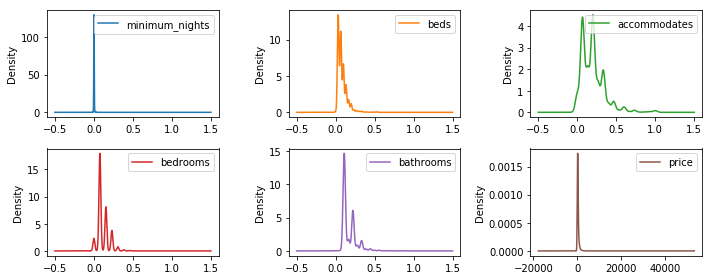

--------------------------------------------------------------
Box


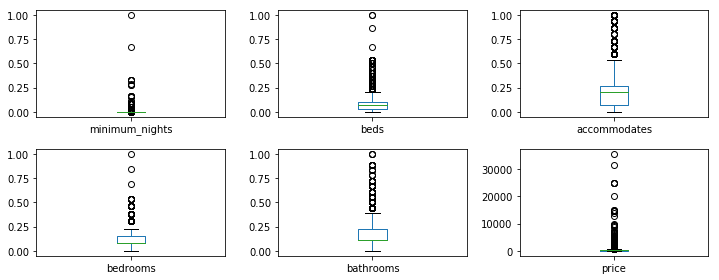

--------------------------------------------------------------
Shape
(9000, 6)
--------------------------------------------------------------
Correlação
minimum_nights    0.061752
beds              0.157380
accommodates      0.201935
bedrooms          0.236026
bathrooms         0.242715
price             1.000000
Name: price, dtype: float64
--------------------------------------------------------------
Heatmap


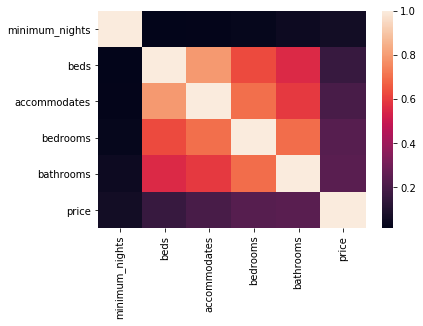

In [0]:
# Mostrando os gráficos e valores dos dados que temos até agora
print_eda(normalized_train)

Para tratar esses valores, iremos usar duas técnicas e, posteriormente, escolher a que melhor comportou nos nossos dados. As técnicas serão:
- [Z-score](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/z-score/): nos permite comparar um valor específico com a população, levando-se em conta o valor típico e a dispersão.
- [IQR](https://pt-pt.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/interquartile-range-iqr/a/interquartile-range-review): também conhecida como amplitude interquartil, é uma medida da dispersão dos dados em torno da medida de centralidade.

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
def clean_outliers(data, algorithm='iqr'):
  """Essa função limpa os outliers, podendo ser escolhido o algoritmo
  IQR ou Z-Score.
  
  Return: df
    O dataframe com os outliers tratados.
  """
  df = data.copy()
  if algorithm == "iqr":
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    up = Q3 + 1.5 * IQR
    df = df[((df > low).all(axis=1) & (df < up).all(axis=1))]
  elif algorithm == "z-score":
    df = pd.DataFrame(StandardScaler().fit_transform(df),
                            columns=df.columns,
                            index=df.index)
    df = df[(df < 2.698).all(axis=1) & (df > -2.698).all(axis=1)]
  return df

In [0]:
train_iqr = clean_outliers(normalized_train,"iqr")
train_z_score = clean_outliers(normalized_train,"z-score")
train_z_score['price'] = normalized_train.loc[train_z_score.index.tolist()]['price']

Density


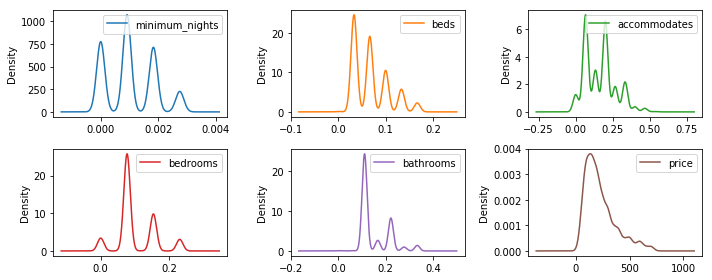

--------------------------------------------------------------
Box


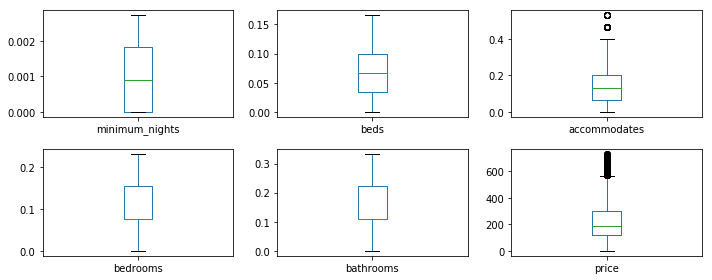

--------------------------------------------------------------
Shape
(6816, 6)
--------------------------------------------------------------
Correlação
minimum_nights    0.185207
beds              0.329370
bathrooms         0.392960
accommodates      0.445633
bedrooms          0.450245
price             1.000000
Name: price, dtype: float64
--------------------------------------------------------------
Heatmap


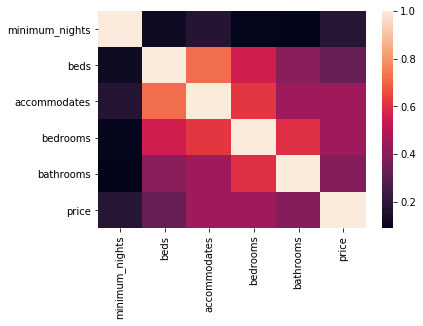

In [0]:
print_eda(train_iqr)

Density


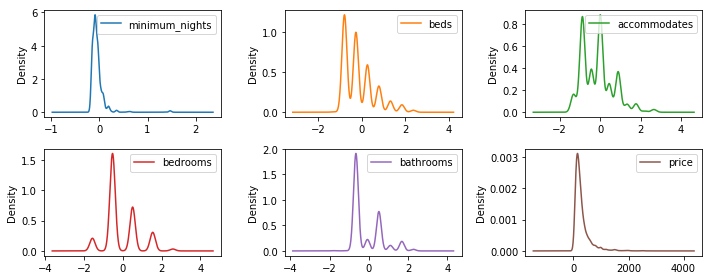

--------------------------------------------------------------
Box


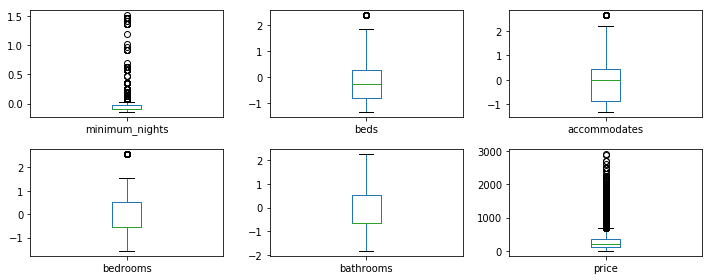

--------------------------------------------------------------
Shape
(8556, 6)
--------------------------------------------------------------
Correlação
minimum_nights    0.074771
beds              0.340120
accommodates      0.438538
bathrooms         0.447135
bedrooms          0.479439
price             1.000000
Name: price, dtype: float64
--------------------------------------------------------------
Heatmap


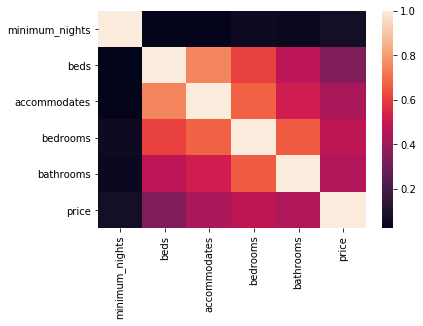

In [0]:
print_eda(train_z_score)

O método _z-score_ permitiu termos uma quantidade maior de dados para podermos treinar, aumentando inclusive a correlação entre as colunas com _price_, porém tratou os _outliers_ de forma menos eficiente quanto ao _IQR_. Para decidirmos de forma mais firme, a seguir iremos treinar 3 modelos básicos e observaremos os seus [RMSE](https://www.statisticshowto.datasciencecentral.com/rmse/) para podermos escolher qual _DataFrame_ iremos utilizar para treinar nosso modelo.

# Modelo inicial
No treinamento inicial, iremos treinar 3 modelos:
1. Com os dados limpos e normalizados (**normalized_train**);
1. Com os dados após IQR (**train_iqr**);
1. Com os dados após Z-Score (**train_z_score**).

Iremos verificar o RMSE de cada um, para decidirmos qual _DataFrame_ usar. Após, na etapa de encontrar o melhor modelo, iremos aplicar vários modelos nos dados com o melhor RMSE. Por fim, iremos melhorar o nosso modelo final e aplicá-lo nas variáveis de teste.

Iremos usar:

- **[sqrt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sqrt.html)**: calcula a raiz quadrada do valor passado.
- **[mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)**: calcula o erro médio quadrático.
- **[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)**: divide matrizes em subconjuntos aleatórios de treino e teste.

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

## Treinamento inicial
A ordem dos modelos será igual a anteriormente citada.

In [0]:
# 10% para teste, 90% para treino
test_size = 0.10
# Semente usada pelo gerador de números aleatórios
seed = 20

### Modelo com os dados limpos e normalizados
_DataFrame_ utilizado: `normalized_train`.

In [0]:
# Separamos o X e Y de treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(normalized_train.drop(axis=1,labels=["price"]), 
                                                    normalized_train["price"],
                                                    test_size=test_size, 
                                                    random_state=seed)
# Imprime as dimensões de X para treino e teste
print(X_train.shape, X_test.shape)

(8100, 5) (900, 5)


In [0]:
# Modelo básico inicial
knn = KNeighborsRegressor(n_neighbors=5, n_jobs=-1)

# Treina o modelo básico
knn.fit(X_train, Y_train)

# Predizer os preços
predict = knn.predict(X_test)

In [0]:
# RMSE
rmse = np.sqrt(mean_squared_error(Y_test,predict))
print(rmse)

1333.5310495739413


### Modelo com os dados após IQR
_DataFrame_ utilizado: `train_iqr`.

In [0]:
# Separamos o X e Y de treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(train_iqr.drop(axis=1,labels=["price"]), 
                                                    train_iqr["price"],
                                                    test_size=test_size, 
                                                    random_state=seed)
# Imprime as dimensões de X para treino e teste
print(X_train.shape,X_test.shape)

(6134, 5) (682, 5)


In [0]:
# Modelo básico inicial
knn = KNeighborsRegressor(n_neighbors=5, n_jobs=-1)

# Treina o modelo básico
knn.fit(X_train, Y_train)

# Predizer os preços
predict = knn.predict(X_test)

In [0]:
# RMSE
rmse = np.sqrt(mean_squared_error(Y_test,predict))
print(rmse)

129.95883692995903


### Modelo com os dados após Z-Score
_DataFrame_ utilizado: `train_z_score`.

In [0]:
# Separamos o X e Y de treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(train_z_score.drop(axis=1,labels=["price"]), 
                                                    train_z_score["price"],
                                                    test_size=test_size, 
                                                    random_state=seed)
# Imprime as dimensões de X para treino e teste
print(X_train.shape,X_test.shape)

(7700, 5) (856, 5)


In [0]:
# Modelo básico inicial
knn = KNeighborsRegressor(n_neighbors=5, n_jobs=-1)

# Treina o modelo básico
knn.fit(X_train, Y_train)

# Predizer os preços
predict = knn.predict(X_test)

In [0]:
# RMSE
rmse = np.sqrt(mean_squared_error(Y_test,predict))
print(rmse)

236.6176893948959


Iremos usar os dados por IQR, pois teve o melhor valor de RMSE.

In [0]:
# Separamos o X e Y de treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(train_iqr.drop(axis=1,labels=["price"]),
                                                    train_iqr["price"],
                                                    test_size=test_size,
                                                    random_state=seed)
# Imprime as dimensões de X para treino e teste
print(X_train.shape, X_test.shape)

(6134, 5) (682, 5)


# Encontrando o melhor modelo
Agora que sabemos qual _DataFrame_ utilizar, vamos aplicar algumas técnicas de [AutoML](https://www.automl.org/automl/auto-sklearn/) para encontrarmos os melhores parâmetros para o nosso modelo. Usaremos [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html) para a melhor evolução do modelo.

O que estamos usando de novo:

- [**sklearn.model_selection.KFold**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html): K-Folds cross-validator.
- [**sklearn.model_selection.cross_val_score**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html): avaliar o score usando cross-validation.
- [**sklearn.pipeline.Pipeline**](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): pipelines que serão aplicados.
- [**sklearn.preprocessing.QuantileTransformer**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html): realiza o `transform` usando quartis.
- [**sklearn.preprocessing.Normalizer**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html): realiza a normalização.
- [**sklearn.preprocessing.RobustScaler**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html): dimensione recursos usando estatísticas robustas para outliers.
- [**sklearn.preprocessing.PowerTransformer**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html): aplica transformação de potência.

**Exercícios**:
1. Defina o número de _folds_ para `6`.
1. Defina a semente de aleatoriedade para `20`.
1. Defina os seguintes pipelines:
  1. **ScaledKnn**: chame a etapa de `Scaler` e aplique `StandardScaler()`.
  1. **NormalizedKnn**: chame a etapa de `Normalizer` e aplique `Normalizer()`.
  1. **RobustedKnn**: chame a etapa de `Robust` e aplique `RobustScaler()`.
  1. **QuantiledKnn**: chame a etapa de `Quantile` e aplique `QuantileTransformer()`.
  1. **PoweredKnn**: chame a etapa de `Power` e aplique `PowerTransformer()`.

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

In [0]:
# Opções de teste e métrica de avaliação
num_folds = 6
seed = 20
scoring = 'neg_mean_squared_error'

In [0]:
# Pipeline de modelos que iremos aplicar
pipelines = []
pipelines.append(('NonScaledKnn', 
                  Pipeline([('KNN',
                             KNeighborsRegressor(n_neighbors=5, algorithm="brute",n_jobs=-1))])))
pipelines.append(('ScaledKnn', 
                  Pipeline([('Scaler', 
                             StandardScaler()),
                            ('KNN',
                             KNeighborsRegressor(n_neighbors=5, n_jobs=-1))])))
pipelines.append(('NormalizedKnn', 
                  Pipeline([('Normalizer', 
                             Normalizer()),
                            ('KNN',
                             KNeighborsRegressor(n_neighbors=5, n_jobs=-1))])))
pipelines.append(('RobustedKnn', 
                  Pipeline([('Robust', 
                             RobustScaler()),
                            ('KNN',
                             KNeighborsRegressor(n_neighbors=5, n_jobs=-1))])))
pipelines.append(('QuantiledKnn', 
                  Pipeline([('Quantile', 
                             QuantileTransformer()),
                            ('KNN',
                             KNeighborsRegressor(n_neighbors=5, n_jobs=-1))])))
pipelines.append(('PoweredKnn', 
                  Pipeline([('Power', 
                             PowerTransformer()),
                            ('KNN',
                             KNeighborsRegressor(n_neighbors=5, n_jobs=-1))])))

**Exercícios**:
1. Atribua a `n_splits` a quantidade de _folds_ definido anteriormente.
1. Atribua a `random_state` a semente de aleatoriedade definida anteriormente.
1. No `cross_val_score`:
  1. Atribua o modelo que você quer treinar.
  1. Os dados de treinamento (`X_train`).
  1. Os dados de teste (`Y_train`).
  1. Atribua a `cv` a quantidade de _folds_ definidas anteriormente.


In [0]:
# Aplicar os modelos e verificar a mean e std
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print("%s Mean: %f Std: %f" % (name, 
                                 np.sqrt(-cv_results.mean()),
                                 np.sqrt(cv_results.std())))

NonScaledKnn Mean: 128.440132 Std: 25.511721
ScaledKnn Mean: 129.289452 Std: 23.217983
NormalizedKnn Mean: 130.130816 Std: 26.537210
RobustedKnn Mean: 130.216994 Std: 27.474436
QuantiledKnn Mean: 130.900427 Std: 28.914489
PoweredKnn Mean: 128.968342 Std: 28.916522


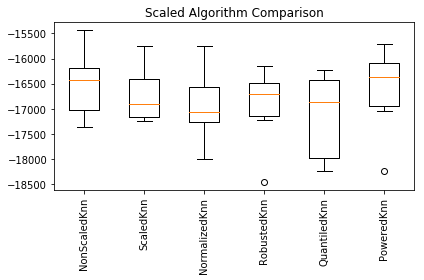

In [0]:
# Mostra um conjunto de BoxPlot para cada modelo
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names,rotation=90)
plt.title('Scaled Algorithm Comparison')
plt.tight_layout()
plt.show()

## Observações
Faça observações sobre os resultados dos seus modelos.

**ESCOLHA UM MODELO PARA USAR EM DIANTE**.

- **NonScaledKnn**: Possui um **std** mediano (nem tão disperso e nem tão focado), porém com 1 outlier visível no _boxplot_. Os dados são assimétricos para a direita.
- **ScaledKnn**: Possui um **std** um pouco mais focado, com uma extensão considerável entre o Q3 e o limite superior no _boxplot_, principalmente se comparado a distância entre o Q1 e o limite inferior. Os dados são assimétricos para a esquerda
- **NormalizedKnn**: Possui o **std** mais focado dos modelos, porém com 2 outlier visíveis no _boxplot_, além de comportar uma extensão muito pequeno no seu todo, principalmente se comparado aos outros modelos. Os dados são assimétricos para a direita.
- **RobustedKnn**: Possui o pior **std**, ou seja, muito disperso, bastante visível se observar a metade dos dados que encontra-se dentro da extensão entre Q1 e Q3 com a metade dos dados que encontra-se fora dessa extensão no _boxplot_.
- **QuantiledKnn**: Possui um **std** indicando dispersão relativamente alta, além de seus dados serem mais assimétricos para a direita.
- **PoweredKnn**: Possui um **std** indicando dispersão relativamente alta, ainda com 1 outlier visível no _boxplot_.

## Melhorando o modelo
Agora vamos realizar alguns testes para encontrar melhores parâmetros para o nosso modelo já definido.

O que estamos usando de novo:
- [**sklearn.model_selection.GridSearchCV**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html): busca exaustiva por parâmetros específicos.

**Exercícios**:
- Acesse a documentação e defina quais serão os parâmetros usados na sua malha de busca.
- Aplique o escalar escolhido anteriormente.


In [0]:
from sklearn.model_selection import GridSearchCV

# Hiperparâmetros
param_grid = {
    'n_jobs': [-1],
    'n_neighbors': list(range(5, 25, 2)),
    'weights': [
        'uniform'
    ],
    'leaf_size': list(range(10, 51, 10)),
    'algorithm': [
        'auto',
        'brute',
    ],
    'metric': [
        'euclidean',
        'manhattan',
        'minkowski',
    ]
}

# Scaler
scaler = RobustScaler().fit_transform(X_train)

# Instância do modelo
model = KNeighborsRegressor()

# Cross-validation
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid, 
                    scoring=scoring,
                    cv=kfold)

grid_result = grid.fit(scaler, Y_train)

# Mostrar resultados
print("Best: %f using %s" % (np.sqrt(-grid_result.best_score_), 
                             grid_result.best_params_))
means = np.sqrt(-grid_result.cv_results_['mean_test_score'])
stds = np.sqrt(grid_result.cv_results_['std_test_score'])
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 121.105506 using {'algorithm': 'brute', 'leaf_size': 10, 'metric': 'manhattan', 'n_jobs': -1, 'n_neighbors': 23, 'weights': 'uniform'}
129.386301 (26.840510) with: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_jobs': -1, 'n_neighbors': 5, 'weights': 'uniform'}
126.622928 (28.103173) with: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_jobs': -1, 'n_neighbors': 7, 'weights': 'uniform'}
125.198707 (27.922901) with: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_jobs': -1, 'n_neighbors': 9, 'weights': 'uniform'}
124.191093 (27.955233) with: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_jobs': -1, 'n_neighbors': 11, 'weights': 'uniform'}
123.599685 (27.593009) with: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_jobs': -1, 'n_neighbors': 13, 'weights': 'uniform'}
122.993050 (24.401455) with: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_jobs': -1, 'n_neighbors': 15, 'weights

## Avaliando o model
Vamos aplicar o nosso modelo nos dados de teste, para verificarmos o RMSE.

**Exercício**:
1. Aplique novamente o escalar escolhido.

In [0]:
# Aplicando o modelo no X_test
predict = grid_result.best_estimator_.predict(RobustScaler().fit_transform(X_test))

# Verificando o RMSE do modelo
rmse = np.sqrt(mean_squared_error(predict, Y_test))
print(rmse)

123.61766192251493
